In [4]:
# Imports

import tensorflow as tf
from tensorflow import keras
import sys
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Custom Imports
from tensorflow.keras import datasets, layers, models, preprocessing

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())
print(tf.version.VERSION)
print(sys.version)

Num GPUs Available:  1
True
2.7.0
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [5]:
# Split Dataset into training and validation 

batch_size = 32
img_height = 180
img_width = 180

Image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)


train_generator = Image_datagen.flow_from_directory(
    './Images/Train',
    target_size=(180,180),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

test_generator = Image_datagen.flow_from_directory(
    './Images/Test',
    target_size=(180,180),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 3280 images belonging to 5 classes.
Found 1028 images belonging to 5 classes.


In [6]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'Boots', 1: 'Sandals', 2: 'Shoes', 3: 'Slippers', 4: 'Socks'}


In [7]:
model = keras.models.load_model('Best_Footwear_Detector.h5')

(1, 180, 180, 3)
tf.Tensor([[0.1488476  0.1488476  0.1488476  0.40460968 0.1488476 ]], shape=(1, 5), dtype=float32)
This image most likely belongs to Slippers with a 40.46 percent confidence.


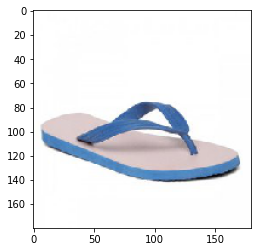

In [18]:
testimage_path = "Unseen_Images/Slippers.jpg"
img = tf.keras.preprocessing.image.load_img(
    testimage_path, target_size=(img_height, img_width)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

print(img_array.shape)
plt.imshow(img)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(score)
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(labels[np.argmax(score)], 100 * np.max(score))
)